<a href="https://colab.research.google.com/github/victorteodoro/projeto-aplicado-ii/blob/main/4_Preparando_o_conjunto_de_treinamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Entendo o problema

Para iniciar a preparação antes vamos entender as possíveis operações que podem ser feitas na imagem que criam novas imagens únicas a partir de uma imagem inicial.

1. Podemos rotacionar a imagem 90, 180 e 270 graus sem deformar os pixeis com a função *rotate* disponível no objeto da *Image PIL*.

2. Podemos inverter horizontalmente e/ou verticalmente usando traspose também disponível no objeto.

Após aplicar as possíveis combinações de transformações temos 16 resultados duplicados que podem ser agrupados em 8 resultados únicos.

Para descobrir o caminho menos complexo (com menos transformações da imagem) para cada resultado vamos contar o número de passos (transformações) utilizados e evidenciar o caminho mais curto na variável *melhor_opcao*.

----------------------------------------------

Existem 8 possíveis resultados únicos:



'RGBX'

['Em 0 passos: Não rotacionado',
 'Em 3 passos: Rotacionado em 180 graus e invertendo horizontalmente e verticalmente']

''

'GRXB'

['Em 1 passos: Não rotacionado e invertendo horizontalmente',
 'Em 2 passos: Rotacionado em 180 graus e invertendo verticalmente']

''

'BXRG'

['Em 1 passos: Não rotacionado e invertendo verticalmente',
 'Em 2 passos: Rotacionado em 180 graus e invertendo horizontalmente']

''

'XBGR'

['Em 2 passos: Não rotacionado e invertendo horizontalmente e verticalmente',
 'Em 1 passos: Rotacionado em 180 graus']

''

'GXRB'

['Em 1 passos: Rotacionado em 90 graus',
 'Em 3 passos: Rotacionado em 270 graus e invertendo horizontalmente e verticalmente']

''

'XGBR'

['Em 2 passos: Rotacionado em 90 graus e invertendo horizontalmente',
 'Em 2 passos: Rotacionado em 270 graus e invertendo verticalmente']

''

'RBGX'

['Em 2 passos: Rotacionado em 90 graus e invertendo verticalmente',
 'Em 2 passos: Rotacionado em 270 graus e invertendo horizontalmente']

''

'BRXG'

['Em 3 passos: Rotacionado em 90 graus e invertendo horizontalmente e verticalmente',
 'Em 1 passos: Rotacionado em 270 graus']

''


 O melhor caminho para cada um é:



'RGBX'

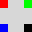

'Não rotacionado'

''

'GRXB'

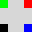

'Não rotacionado e invertendo horizontalmente'

''

'BXRG'

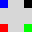

'Não rotacionado e invertendo verticalmente'

''

'XBGR'

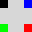

'Rotacionado em 180 graus'

''

'GXRB'

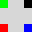

'Rotacionado em 90 graus'

''

'XGBR'

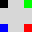

'Rotacionado em 90 graus e invertendo horizontalmente'

''

'RBGX'

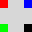

'Rotacionado em 90 graus e invertendo verticalmente'

''

'BRXG'

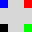

'Rotacionado em 270 graus'

''

In [42]:
from PIL import Image
from IPython.display import display

# Criando uma imagem branca de 32x32 pixels
img = Image.new("RGB", (32, 32), (215,215,215))

# Acessando o contexto de desenho da imagem
pixels = img.load()

# Preenchendo cada canto com a cor especificada (R, G, B, e preto)
# Canto superior esquerdo: Vermelho (R)
for x in range(8):
    for y in range(8):
        pixels[x, y] = (255, 0, 0)  # Vermelho

# Canto superior direito: Verde (G)
for x in range(24, 32):
    for y in range(8):
        pixels[x, y] = (0, 255, 0)  # Verde

# Canto inferior esquerdo: Azul (B)
for x in range(8):
    for y in range(24, 32):
        pixels[x, y] = (0, 0, 255)  # Azul

# Canto inferior direito: Preto
for x in range(24, 32):
    for y in range(24, 32):
        pixels[x, y] = (0, 0, 0)  # Preto

def lerCores(img):
  lista = [img.getpixel((0,0)), img.getpixel((31,0)), img.getpixel((0,31)), img.getpixel((31,31))]
  cores = {"R":(255,0,0), "G":(0,255,0), "B":(0,0,255), "X":(0,0,0)}
  res = ""
  for item in lista:
    for letra, cor in cores.items():
      if item == cor:
        res += letra
        break;
  return res

codigos = []

possibilidades = {}

complexidade = {}

melhor_opcao = {}

imagens = {}

def analisarResultado(img, rot, comp, passos):
  global codigos, possibilidades, complexidade, melhor_opcao, imagens
  codigo = lerCores(img)

  if rot>0:
    msg = f"Rotacionado em {rot} graus"+comp
  else:
    msg = "Não rotacionado"+comp

  if not codigo in codigos:
    codigos.append(codigo)
    possibilidades[codigo] = []
    complexidade[codigo] = passos
    melhor_opcao[codigo] = msg
    imagens[codigo] = img

  else:
    if passos < complexidade[codigo]:
      complexidade[codigo] = passos
      melhor_opcao[codigo] = msg
      imagens[codigo] = img

  possibilidades[codigo].append(f"Em {passos} passos: "+msg)


for r in range(0,4):
  r_img = img.rotate(r*90)
  if r==0: passos=0
  else: passos=1

  analisarResultado(r_img, r*90, "", passos)

  # Invertendo a imagem horizontalmente
  analisarResultado(r_img.transpose(Image.FLIP_LEFT_RIGHT), r*90, " e invertendo horizontalmente", passos+1)

  # Invertendo a imagem verticalmente
  analisarResultado(r_img.transpose(Image.FLIP_TOP_BOTTOM), r*90, " e invertendo verticalmente", passos+1)

  # Invertendo a imagem horizontalmente e verticalmente
  analisarResultado(r_img.transpose(Image.FLIP_LEFT_RIGHT).transpose(Image.FLIP_TOP_BOTTOM), r*90, " e invertendo horizontalmente e verticalmente", passos+2)

print(f"----------------------------------------------\n\nExistem {len(possibilidades)} possíveis resultados únicos:\n")
for i,n in possibilidades.items():
  display(i,n,"")
print("\n O melhor caminho para cada um é:\n")
for i,n in melhor_opcao.items():
  display(i,imagens[i],n,"")

Agora que executamos o teste das operações sobre a imagem podemos aplicá-lo para expandir nosso modelo de treinamento.

O conjunto de treinamento que será extraído da imagem rotulada terá seu tamanho multiplicado por 8 ao aplicar as tranformações e ainda sim terá apenas imagens únicas.

As tranformações propostas devem ser aplicadas tanto à matriz de entrada com 12x12 pixeis quanto à matriz categorica de saída de 4x4 pixeis.